In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import pandas as pd

In [4]:
data = pd.read_csv('Exeter_sfc_2016.csv')

In [5]:
data['Date'].name

'Date'

In [6]:
def array_location(array):
    mean = np.mean(array)
    median = np.median(array)
    trimean = (np.percentile(array, 25) + 2*np.percentile(array, 50) + np.percentile(array, 75)) / 4
    return (mean, median, trimean)

In [7]:
def array_spread(array):
    sd = np.std(array)
    IQR = ss.iqr(array)
    median = np.median(array)
    data = np.zeros(len(array))
    for i in range(len(data)):
        data[i] = abs(array[i] - median)
    MAD = np.median(data)
    return (sd, IQR, MAD)

In [8]:
array_location(data['MaxT'])

(14.790379781420766, 14.0745, 14.5354375)

In [9]:
array_spread(data['MaxT'])

(5.219978747682587, 8.299750000000003, 4.099500000000001)

In [10]:
array_location(data['MeanHumidity'])

(81.15027322404372, 81.0, 81.25)

In [11]:
array_spread(data['MeanHumidity'])

(7.917390241194357, 11.0, 6.0)

In [12]:
def num_bins(data): 
    q25, q75 = np.percentile(data,[25,75])
    bin_width = 2*(q75 - q25)*len(data)**(-1/3)
    bins = int(round((data.max() - data.min())/bin_width))
    return [bin_width, bins]

In [13]:
def histplot(array):
    bin_width = num_bins(array)[0]
    numbins = num_bins(array)[1]
    plt.figure()
    plt.hist(array, numbins)
    plt.xlabel(array.name)
    num_points = len(array)
    plt.ylabel(f'Relative frequency (fraction of {num_points})')
    plt.title(f'Histogram of {array.name} with {numbins} bins of width {bin_width}')

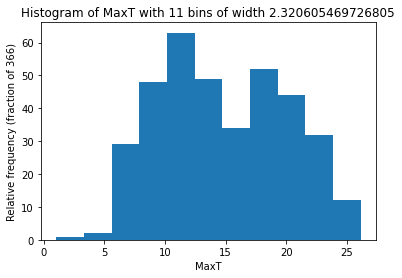

In [14]:
histplot(data['MaxT'])

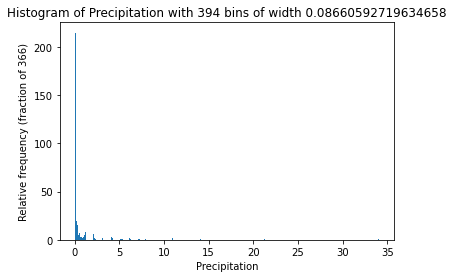

In [15]:
histplot(data['Precipitation'])

Text(0, 0.5, 'Humidity')

<Figure size 432x288 with 0 Axes>

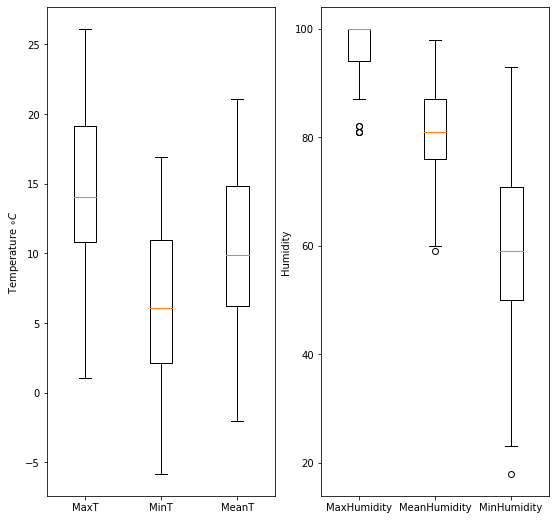

In [16]:
plt.figure()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (9,9))
labels1 = ['MaxT', 'MinT', 'MeanT']
bplot1 = axes[0].boxplot([data['MaxT'], data['MinT'], data['MeanT']], labels = labels1)
axes[0].set_ylabel(r'Temperature $\circ{} C$')

labels2 = ['MaxHumidity', 'MeanHumidity', 'MinHumidity']
bplot2 = axes[1].boxplot([data['MaxHumidity'], data['MeanHumidity'], data['MinHumidity']], labels = labels2)
axes[1].set_ylabel('Humidity')

[Text(0, 0, 'MaxHumidity'),
 Text(0, 0, 'MeanHumidity'),
 Text(0, 0, 'MinHumidity')]

<Figure size 432x288 with 0 Axes>

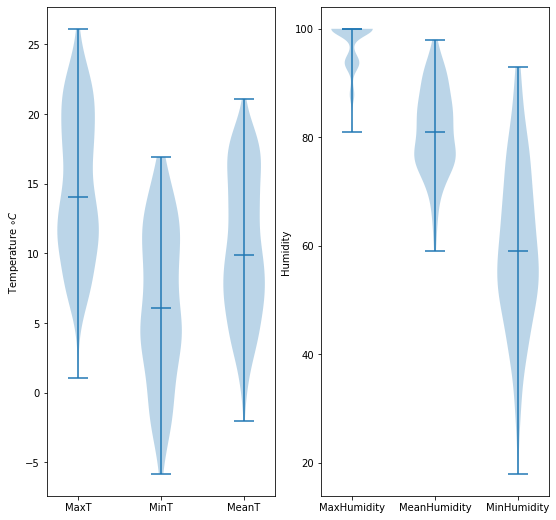

In [17]:
plt.figure()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (9,9))
labels1 = ['MaxT', 'MinT', 'MeanT']
pos = [1,2,3]
bplot1 = axes[0].violinplot([data['MaxT'], data['MinT'], data['MeanT']], pos, showmedians = True)
axes[0].set_ylabel(r'Temperature $\circ{} C$')
axes[0].set_xticks(pos)
axes[0].set_xticklabels(labels1)

labels2 = ['MaxHumidity', 'MeanHumidity', 'MinHumidity']
bplot2 = axes[1].violinplot([data['MaxHumidity'], data['MeanHumidity'], data['MinHumidity']], pos, showmedians = True)
axes[1].set_ylabel('Humidity')
axes[1].set_xticks(pos)
axes[1].set_xticklabels(labels2)